In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-emergency-ambulance-datasets/India_Ambulance_Demand_Synthetic_50k.csv


In [2]:
df = pd.read_csv('/kaggle/input/india-emergency-ambulance-datasets/India_Ambulance_Demand_Synthetic_50k.csv')
df.head()

,State,Zone,Day,Time_Slot,Emergency_Type,Weather,Demand_Level
0,All India,Highway,Thursday,Night,EMS,Fog,Medium
1,All India,Highway,Friday,Evening,Traffic,Heatwave,Medium
2,Jammu and Kashmir,Urban,Monday,Night,EMS,Rain,Medium
3,Arunachal Pradesh,Urban,Sunday,Afternoon,EMS,Clear,Medium
4,Uttar Pradesh,Highway,Sunday,Evening,EMS,Clear,Medium


In [3]:
def generate_demand(row):
    score = 0

    if row['Zone'] == 'Highway':
        score += 2
    if row['Time_Slot'] in ['Evening', 'Night']:
        score += 2
    if row['Emergency_Type'] == 'Traffic':
        score += 2
    if row['Weather'] in ['Rain', 'Fog']:
        score += 1

    # RANDOMNESS (MOST IMPORTANT)
    score += random.choice([-1, 0, 1])

    if score >= 5:
        return 'High'
    elif score >= 3:
        return 'Medium'
    else:
        return 'Low'

# 🔥 OVERWRITE TARGET
df['Demand_Level'] = df.apply(generate_demand, axis=1)


In [4]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [5]:
df.shape

(50000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           50000 non-null  object
 1   Zone            50000 non-null  object
 2   Day             50000 non-null  object
 3   Time_Slot       50000 non-null  object
 4   Emergency_Type  50000 non-null  object
 5   Weather         50000 non-null  object
 6   Demand_Level    50000 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


In [7]:
for i in df:
    print(df[i].value_counts())
    print(('-')*70)

State
All India                                   24955
Uttar Pradesh                                4165
Maharashtra                                  3152
West Bengal                                  3003
Jharkhand                                    1711
Madhya Pradesh                               1707
Bihar                                        1499
Rajasthan                                    1317
Tamil Nadu                                   1172
Orissa                                       1003
Assam                                         929
Karnataka                                     766
Andhra Pradesh                                566
Haryana                                       554
Chhatisgarh                                   497
Jammu and Kashmir                             423
Telangana                                     422
Uttarakhand                                   368
Himachal Pradesh                              351
Gujarat                                     

In [8]:
df.describe()

,State,Zone,Day,Time_Slot,Emergency_Type,Weather,Demand_Level
count,50000,50000,50000,50000,50000,50000,50000
unique,35,3,7,4,3,4,3
top,All India,Urban,Tuesday,Afternoon,EMS,Rain,Low
freq,24955,16774,7686,18827,24601,12573,24877


In [9]:
df.isnull().sum()

State             0
Zone              0
Day               0
Time_Slot         0
Emergency_Type    0
Weather           0
Demand_Level      0
dtype: int64

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

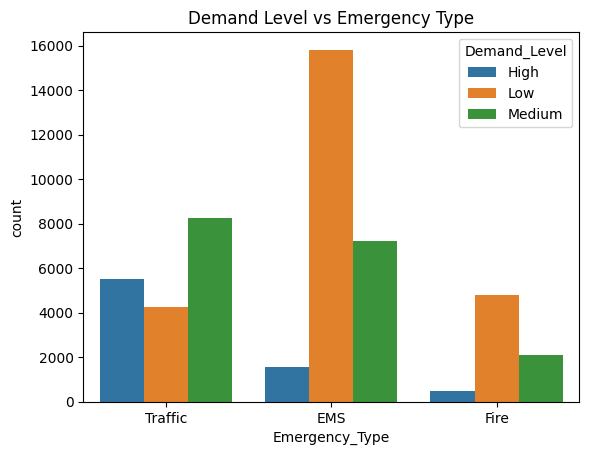

In [11]:
sns.countplot(x='Emergency_Type', hue='Demand_Level', data=df)
plt.title("Demand Level vs Emergency Type")
plt.show()


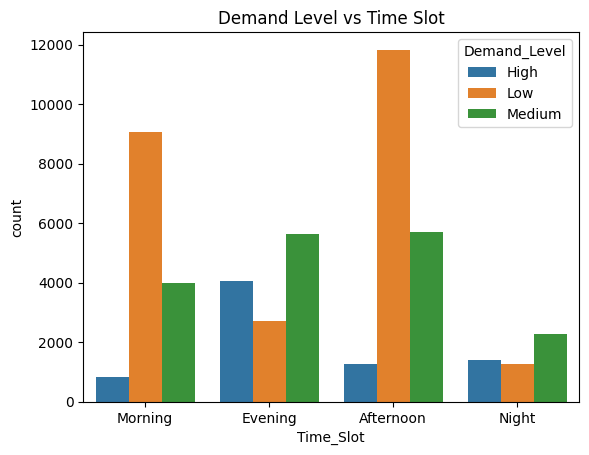

In [12]:
sns.countplot(x='Time_Slot', hue='Demand_Level', data=df)
plt.title("Demand Level vs Time Slot")
plt.show()


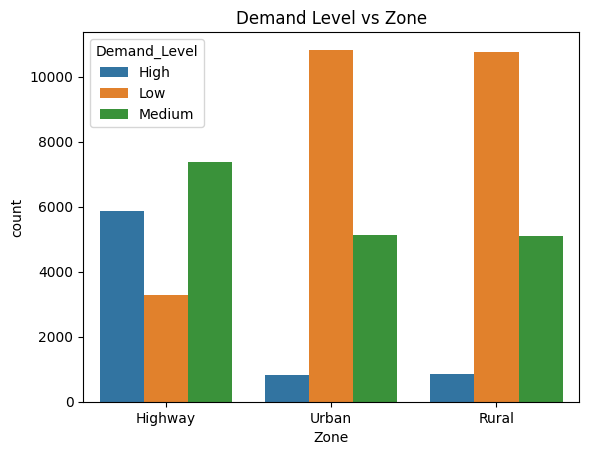

In [13]:
sns.countplot(x='Zone', hue='Demand_Level', data=df)
plt.title("Demand Level vs Zone")
plt.show()


In [14]:
df_encoded = pd.get_dummies(
    df,
    columns=[
        'State',
        'Zone',
        'Day',
        'Time_Slot',
        'Emergency_Type',
        'Weather'
    ],
    drop_first=True
)


In [15]:
X = df.drop('Demand_Level', axis=1)
y = df['Demand_Level']

In [16]:
X = df_encoded.drop('Demand_Level', axis=1)
y = df_encoded['Demand_Level']

split_point = int(0.7 * len(df_encoded))

X_train = X.iloc[:split_point]
X_test  = X.iloc[split_point:]

y_train = y.iloc[:split_point]
y_test  = y.iloc[split_point:]


In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(35000, 50)
(35000,)
(15000, 50)
(35000,)


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    C=0.5  # Regularization (IMPORTANT)
)

model.fit(X_train, y_train)



LogisticRegression(C=0.5, max_iter=1000, multi_class='multinomial')

In [19]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.7728

Classification Report:

              precision    recall  f1-score   support

        High       0.75      0.74      0.75      2245
         Low       0.85      0.85      0.85      7484
      Medium       0.68      0.68      0.68      5271

    accuracy                           0.77     15000
   macro avg       0.76      0.76      0.76     15000
weighted avg       0.77      0.77      0.77     15000



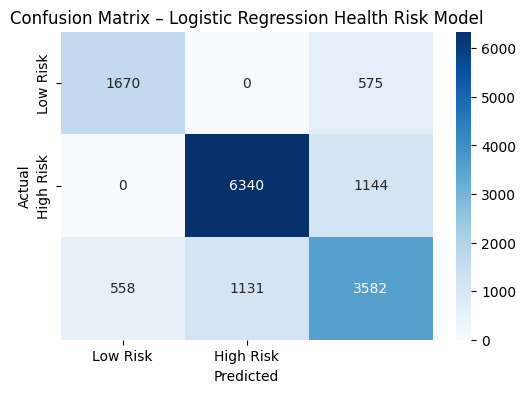

In [20]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Low Risk", "High Risk"],
    yticklabels=["Low Risk", "High Risk"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression Health Risk Model")
plt.show()

In [21]:
def predict_ambulance_info(input_data):
    input_df = pd.DataFrame([input_data])
    pred = model.predict(input_df)[0]
    prob = model.predict_proba(input_df)[0][1]

    return {
        "Predicted_Risk": "High Risk" if pred == 1 else "Low Risk",
        "Risk_Probability (%)": round(prob * 100, 2)
    }

In [22]:
trained_columns = X.columns.tolist()


In [23]:
def predict_ambulance_info(input_data):
    

    # 1️⃣ Raw input → DataFrame
    input_df = pd.DataFrame([input_data])

    # 2️⃣ One-hot encode input
    input_encoded = pd.get_dummies(input_df)

    # 3️⃣ Add missing columns (jo training me the)
    for col in trained_columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    # 4️⃣ Extra columns drop karo (agar koi unknown aa gaya ho)
    input_encoded = input_encoded[trained_columns]

    # 5️⃣ Prediction
    pred_encoded = model.predict(input_encoded)
    pred_label = model.predict(input_encoded)[0]


    # 6️⃣ Probabilities
    probs = model.predict_proba(input_encoded)[0]
    prob_dict = dict(zip(model.classes_, probs))


    return {
        "Predicted_Demand": pred_label,
        "Probabilities": prob_dict
    }


In [24]:
df.sample()

,State,Zone,Day,Time_Slot,Emergency_Type,Weather,Demand_Level
13839,All India,Rural,Wednesday,Afternoon,Traffic,Rain,Low


In [25]:
input_data = {
    'State': 'Rajasthan',
    'Zone': 'Rular',
    'Day': 'Tuesday',
    'Time_Slot': 'Evening',
    'Emergency_Type': 'EMS',
    'Weather': 'Heatwave'
}

predict_ambulance_info(input_data)


{'Predicted_Demand': 'Medium',
 'Probabilities': {'High': 0.34439262328582193,
  'Low': 0.004214075242790715,
  'Medium': 0.6513933014713873}}

In [26]:
import joblib


In [27]:
joblib.dump(model, "Logistic_regression_prediction.pkl")

['Logistic_regression_prediction.pkl']

In [28]:
# models = {
#     "Logistic Regression": {
#         "model": LogisticRegression(max_iter=1000),
#         "params": {
#             "C": [0.01, 0.1, 1, 10],
#             "solver": ["lbfgs"]
#         }
#     },

#     "Random Forest": {
#         "model": RandomForestClassifier(random_state=42),
#         "params": {
#             "n_estimators": [100, 200],
#             "max_depth": [10, 15, None],
#             "min_samples_split": [2, 5]
#         }
#     },

#     "Gradient Boosting": {
#         "model": GradientBoostingClassifier(),
#         "params": {
#             "n_estimators": [100, 200],
#             "learning_rate": [0.05, 0.1],
#             "max_depth": [3, 5]
#         }
#     },


    
# }


In [29]:
# from sklearn.metrics import multilabel_confusion_matrix

# results = []

# for name, config in models.items():
#     print(f"Training {name}...")

#     grid = GridSearchCV(
#         estimator=config["model"],
#         param_grid=config["params"],
#         cv=5,
#         scoring="accuracy",
#         n_jobs=-1
#     )

#     grid.fit(X_train, y_train)
#     best_model = grid.best_estimator_

#     y_pred = best_model.predict(X_test)

#     acc = accuracy_score(y_test, y_pred)
#     prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
#     rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
#     f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

#     # Multiclass confusion matrix (per class)
#     mcm = multilabel_confusion_matrix(y_test, y_pred)

#     # Normal confusion matrix (n x n)
#     cm = confusion_matrix(y_test, y_pred)

#     results.append({
#         "Model": name,
#         "Best_Params": grid.best_params_,
#         "Accuracy": acc,
#         "Precision": prec,
#         "Recall": rec,
#         "F1_Score": f1,
#         "Confusion_Matrix": cm.tolist(),
#         "MultiClass_CM": mcm.tolist()
#     })

# results_df = pd.DataFrame(results)
# results_df = results_df.sort_values(by="Accuracy", ascending=False)

# results_df.to_csv("model_comparison_results.csv", index=False)

# results_df


In [30]:
# best_model = results_df.iloc[0]

# print("Best Model:", best_model["Model"])
# print("Accuracy:", round(best_model["Accuracy"], 3))
# print("Best Parameters:", best_model["Best_Params"])